<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

### Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal wants you to

   - determine the industry factors that are most important in predicting the salary amounts for these data.

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries.

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer this question.

---

### Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to address the question above.

### Factors that impact salary

To predict salary the most appropriate approach would be a regression model.
Here instead we just want to estimate which factors (like location, job title, job level, industry sector) lead to high or low salary and work with a classification model. To do so, split the salary into two groups of high and low salary, for example by choosing the median salary as a threshold (in principle you could choose any single or multiple splitting points).

Use all the skills you have learned so far to build a predictive model.
Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to be able to extrapolate or predict the expected salaries for these listings.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10").

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters:

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [191]:
URL = "https://www.indeed.co.uk/jobs?q=data&l=London%2C+Greater+London"

In [18]:
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
import time
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
r = requests.get(URL)
soup = BeautifulSoup(r.text, 'html.parser')

In [194]:
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <script src="//d3fw5vlhllyvee.cloudfront.net/s/bf00e5f/en_GB.js" type="text/javascript">
  </script>
  <link href="//d3fw5vlhllyvee.cloudfront.net/s/64feb87/jobsearch_all.css" rel="stylesheet" type="text/css"/>
  <link href="https://www.indeed.co.uk/rss?q=data&amp;l=London%2C+Greater+London" rel="alternate" title="Data Jobs, vacancies in London" type="application/rss+xml"/>
  <link href="/m/jobs?q=data&amp;l=London%2C+Greater+London" media="only screen and (max-width: 640px)" rel="alternate"/>
  <script type="text/javascript">
   if (typeof window['closureReadyCallbacks'] == 'undefined') {
window['closureReadyCallbacks'] = [];
}

function call_when_jsall_loaded(cb) {
if (window['closureReady']) {
cb();
} else {
window['closureReadyCallbacks'].push(cb);
}
}
  </script>
  <meta content="1" name="ppstriptst"/>
  <script>
   var _scriptDownloadCount = 0;
var _retryDown

In [195]:
r = requests.get(URL)
soup = BeautifulSoup(r.text, 'html.parser')
title = []
company = []
location = []
salary = []
summary = []
date= []
city_scraped=[]
for job in soup.find_all('div', attrs={'class':'result'}):
    try:
#         title.append(job.find('a', target = '_blank').text.strip())
        title.append(job.find('data-tn-element'=='jobTitle', class_ = 'jobtitle').text.strip())
    except:
        title.append(np.nan)
    try:
        company.append(job.find('span', class_ = 'company').text.strip())
    except:
        company.append(np.nan)
    try:
        location.append(job.find('span', class_ = 'location').text.strip())
    except:
        location.append(np.nan)
    try:       
        salary.append(job.find('span', class_ = 'salaryText').text.strip())
    except:
        salary.append(np.nan)
    try: 
        summary.append(job.find('div', class_='summary').text.strip())
    except:
        summary.append(np.nan)
    try:       
        date.append(job.find('span', class_ = 'date').text.strip())
    except:
        date.append(np.nan)       
#      city_scraped.append(list of cities scraped)   
        
ds = pd.DataFrame({'job_title': title,
                     'company': company,
                     'location': location,
                  'salary': salary,
                  'summary': summary,
                  'date': date})
ds

,job_title,company,location,salary,summary,date
0,Data Adminstrator,Adecco,NaN,£8.72 an hour,The primary objective of the role is to comple...,Today
1,Cricket Trader/Data Analyst,Intelligent Cricket,NaN,"£26,000 - £28,000 a year",You must have a very good knowledge and unders...,26 days ago
2,Data Administrator,Strategy Insights,London,"£19,000 - £22,000 a year",Processing and analysis of all attendees data ...,5 days ago
3,Data Entry Associate,Mizuho,London,NaN,High level of computer literacy and skills in ...,1 day ago
4,Data and Research Analyst,Cancer Research UK,Stratford,"£31,000 a year",Develop specific expertise in relation to canc...,9 days ago
5,Data Entry Operator(UW-9K8754),Binzagr Group,London,NaN,Background in data entry (especially in CPG co...,2 days ago
6,Student Journey Data Manager,University of West London,London,"£47,728 - £53,232 a year",This is a key role supporting our student reco...,Just posted
7,Data Officer,National Army Museum,London,"£37,000 a year",The successful candidate will be focused on ma...,1 day ago
8,Data Analyst,Central London Community Healthcare NHS Trust,London SW1P 2PF,"£32,146 a year",We’re looking for someone with both the advanc...,2 days ago
9,NHS Test and Trace - Data Privacy Advisor,UK Government - Department of Health and Socia...,London,"£36,819 - £45,998 a year",You will be accountable for data privacy compl...,Today


In [196]:
title

['Data Adminstrator',
 'Cricket Trader/Data Analyst',
 'Data Administrator',
 'Data Entry Associate',
 'Data and Research Analyst',
 'Data Entry Operator(UW-9K8754)',
 'Student Journey Data Manager',
 'Data Officer',
 'Data Analyst',
 'NHS Test and Trace - Data Privacy Advisor',
 'NHS Test and Trace - Data Privacy Analyst',
 'Data Analyst – Content & Media',
 'Data Scientist',
 'Data Entry Technician',
 'Research Assistant - Data and Statistics Division']

In [197]:
company

['Adecco',
 'Intelligent Cricket',
 'Strategy Insights',
 'Mizuho',
 'Cancer Research UK',
 'Binzagr Group',
 'University of West London',
 'National Army Museum',
 'Central London Community Healthcare NHS Trust',
 'UK Government - Department of Health and Social Ca...',
 'UK Government - Department of Health and Social Ca...',
 'TalentPool',
 'NHS Midlands and Lancashire Commissioning Support...',
 'Liberty Specialty Markets',
 'Bank of England']

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is in a `span` with `class='salaryText'`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element='jobTitle'`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 
- Decide which other components could be relevant, for example the region or the summary of the job advert.

### Write 4 functions to extract each item: location, company, job, and salary.

Example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it.
    - Remember to use `try/except` if you anticipate errors.
- **Test** the functions on the results above and simple examples.

In [204]:
# r = requests.get(URL)
# soup = BeautifulSoup(r.text, 'html.parser')
# results=[]
# title=[]
def extract_job_title_from_result(soup):
    try:
        title= job.find('data-tn-element'=='jobTitle', class_ = 'jobtitle').text.strip()
    except:
        title= np.nan
    return title
# extract_job_title_from_result(soup)

In [205]:
title

['Data Adminstrator',
 'Cricket Trader/Data Analyst',
 'Data Administrator',
 'Data Entry Associate',
 'Data and Research Analyst',
 'Data Entry Operator(UW-9K8754)',
 'Student Journey Data Manager',
 'Data Officer',
 'Data Analyst',
 'NHS Test and Trace - Data Privacy Advisor',
 'NHS Test and Trace - Data Privacy Analyst',
 'Data Analyst – Content & Media',
 'Data Scientist',
 'Data Entry Technician',
 'Research Assistant - Data and Statistics Division']

In [212]:
def extract_company_from_result(soup):
    try:
        company = job.find('span', class_ = 'company').text.strip()
    except:
        company = np.nan
    return company
# extract_company_from_result(soup)

In [213]:
def extract_location_from_result(soup):

    try:
        location = job.find('span', class_ = 'location').text.strip()
    except:
        location = np.nan
    return location
# extract_location_from_result(soup)

In [214]:
def extract_salary_from_result(soup):
    
    try:
        salary = job.find('span', class_ = 'salaryText').text.strip()
    except:
        try:
            jobex_one: job.find('div',class_ = 'sjcl')
            jobex_two: jobex_one.find('div')
            salary = jobex_two.text.strip()
        except:
            salary = np.nan
    return salary
# extract_salary_from_result(soup)

In [215]:
def extract_summary_from_result(soup):
    try: 
        summary= job.find('div', class_='summary').text.strip()
    except:
        summary = np.nan
    return summary
# extract_summary_from_result(soup)

In [216]:
def extract_date_from_result(soup):
    try:       
        date= job.find('span', class_ = 'date').text.strip()
    except:
        date= np.nan  
    return date
# extract_date_from_result(soup)

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search.
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different.

In [314]:
max_results_per_city = 1500 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.
results = []
title = []
company = []
location = []
salary = []
summary = []
date= []
city_scraped=[]
for city in set(['London','Manchester']):
    if city=='London': 
        max_results_per_city = 6000
    else:
        max_results_per_city = 1500
                
    for start in tqdm(range(0, max_results_per_city, 50)):
        
#             for job in soup.find_all('div', attrs={'class':'result'}):
        url_template = "http://www.indeed.co.uk/jobs?q=data&l={}&radius=50&start={}&limit=50".format(city,start)
        time.sleep(np.abs(np.random.normal(loc=3,scale=0.5)))
        r = requests.get(url_template)
        soup = BeautifulSoup(r.text, 'html.parser')
        for job in soup.find_all('div', attrs={'class':'result'}):

        #                 extract_job_title_from_result(soup)
            title.append(extract_job_title_from_result(soup))
        #                 extract_company_from_result(soup)
            company.append(extract_company_from_result(soup))
        #                 extract_location_from_result(soup)
            location.append(extract_location_from_result(soup))
        #                 extract_salary_from_result(soup)
            salary.append(extract_salary_from_result(soup))
        #                 extract_date_from_result(soup)
            date.append(extract_date_from_result(soup))
            city_scraped.append(city)   
        #appending list of job post info to dataframe at index num
        # df= job_df.loc[num]
#     results


100%|██████████| 120/120 [06:37<00:00,  3.31s/it]


In [315]:
len(title)

3116

In [316]:
for x in list_data:
    print (len(x))

3095
3095
3095
3095
3095
3095


In [317]:
df_lonman = pd.DataFrame()
df_lonman['title'] = title
df_lonman['company'] = company
df_lonman['location'] = location
df_lonman['salary'] = salary
df_lonman['date'] = date
df_lonman['city_scraped'] = city_scraped

In [318]:
df_lonman

,title,company,location,salary,date,city_scraped
0,GIS & Data Manager,Highways England,NaN,"£30,368 - £32,950 a year",Just posted,Manchester
1,Data Adminstrator,Adecco,NaN,£8.72 an hour,1 day ago,Manchester
2,eCommerce Data & Insights Manager,Coop,NaN,NaN,9 days ago,Manchester
3,Data Scientist,Coop,NaN,NaN,5 days ago,Manchester
4,"Administrative Assistant, UK Data Service (par...",The University of Manchester,Manchester M1 6FU,"£21,236 - £23,067 a year",5 days ago,Manchester
...,...,...,...,...,...,...
3111,Data Engineer,Metrica Recruitment,NaN,"£50,000 - £60,000 a year",30+ days ago,London
3112,BI Developer/ BI Engineer,Michael Page UK,NaN,"£50,000 - £55,000 a year",8 days ago,London
3113,Data Insight Manager,Metrica Recruitment,NaN,"£45,000 - £55,000 a year",30+ days ago,London
3114,Software & Data Licensing Manager - Global Inv...,Michael Page UK,NaN,"£50,000 - £55,000 a year",3 days ago,London


In [319]:
df_lonman.city_scraped.value_counts(ascending=False)

London        1718
Manchester    1398
Name: city_scraped, dtype: int64

In [320]:
df_lonman.duplicated().value_counts()

False    1937
True     1179
dtype: int64

In [321]:
df_lonman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116 entries, 0 to 3115
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         3116 non-null   object
 1   company       3116 non-null   object
 2   location      2378 non-null   object
 3   salary        1694 non-null   object
 4   date          3116 non-null   object
 5   city_scraped  3116 non-null   object
dtypes: object(6)
memory usage: 146.2+ KB


In [322]:
df_lonman.salary.value_counts(ascending=False)

£30,000 - £35,000 a year    57
£50,000 - £60,000 a year    52
£50,000 - £55,000 a year    45
£45,000 - £55,000 a year    43
£40,000 - £45,000 a year    37
                            ..
£180 - £200 a day            1
£22,231 - £42,939 a year     1
£43,000 a year               1
£18,500 - £23,000 a year     1
£10.25 - £12.82 an hour      1
Name: salary, Length: 454, dtype: int64

In [323]:
title

['GIS & Data Manager',
 'Data Adminstrator',
 'eCommerce Data & Insights Manager',
 'Data Scientist',
 'Administrative Assistant, UK Data Service (part time)',
 'Data Analyst/Report Developer',
 'Commercial Analyst',
 'Data Analyst',
 'Data Analysis Consultants / Data Scientists',
 'Remote SQL Support Analyst - £35.000 + Bonus',
 'Data Analysis Officer',
 'Data Architect - MDM (CDMP Essential) - Remote Working',
 'Trade Counter Sales /Inbound sales/general office/admin - Ma...',
 'Data Entry Clerk',
 'Data Input Administrator',
 'G7 - Senior Data Scientist',
 'Data Analyst',
 'Data Analyst Intern',
 'Data Science Graduate',
 'Merchandising Admin Assistant - boohoo',
 'Data Analyst',
 'Data Analyst',
 'Data Entry Clerk',
 'Data Entry and Office Administrator Required',
 'DATA SCIENCE GRADUATE',
 'Accounts Assistant/Administrator',
 'Sustainability Data and Systems Analyst',
 'Data Design Analyst',
 'Data Analysts - Evaluate',
 'Data Science Instructor',
 'Data technical officer',
 'Data

In [324]:
len(location)

3116

In [325]:
len(city_scraped)

3116

In [326]:
len(company)

3116

In [327]:
len(title)

3116

In [328]:
len(location)

3116

In [329]:
len(date)

3116

In [330]:
df_lonman_nd= df_lonman.drop_duplicates(subset=None, keep="first",inplace=False)

In [331]:
df_lonman_nd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 0 to 2628
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1937 non-null   object
 1   company       1937 non-null   object
 2   location      1842 non-null   object
 3   salary        936 non-null    object
 4   date          1937 non-null   object
 5   city_scraped  1937 non-null   object
dtypes: object(6)
memory usage: 105.9+ KB


In [332]:
# df_lonman_nd.to_csv("lonman_nd.csv", 
#                          encoding="utf-8")

In [333]:
max_results_per_city = 1000 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.
results = []
title = []
company = []
location = []
salary = []
summary = []
date= []
city_scraped=[]
for city in set(['Oxford','Sheffield',
                'Liverpool']):
    if city=='London': 
        max_results_per_city = 6000
    else:
        max_results_per_city = 1000
                
    for start in tqdm(range(0, max_results_per_city, 50)):
        
#             for job in soup.find_all('div', attrs={'class':'result'}):
        url_template = "http://www.indeed.co.uk/jobs?q=data&l={}&radius=50&start={}&limit=50".format(city,start)
        time.sleep(np.abs(np.random.normal(loc=3,scale=0.5)))
        r = requests.get(url_template)
        soup = BeautifulSoup(r.text, 'html.parser')
        for job in soup.find_all('div', attrs={'class':'result'}):

        #                 extract_job_title_from_result(soup)
            title.append(extract_job_title_from_result(soup))
        #                 extract_company_from_result(soup)
            company.append(extract_company_from_result(soup))
        #                 extract_location_from_result(soup)
            location.append(extract_location_from_result(soup))
        #                 extract_salary_from_result(soup)
            salary.append(extract_salary_from_result(soup))
        #                 extract_date_from_result(soup)
            date.append(extract_date_from_result(soup))
            city_scraped.append(city)   
        #appending list of job post info to dataframe at index num
        # df= job_df.loc[num]
#     results


100%|██████████| 20/20 [01:21<00:00,  4.07s/it]


In [334]:
df_oxshliv = pd.DataFrame()
df_oxshliv['title'] = title
df_oxshliv['company'] = company
df_oxshliv['location'] = location
df_oxshliv['salary'] = salary
df_oxshliv['date'] = date
df_oxshliv['city_scraped'] = city_scraped

In [335]:
df_oxshliv

,title,company,location,salary,date,city_scraped
0,Data Analyst,Go Plant Fleet Services Ltd,NaN,"£18,000 - £22,000 a year",2 days ago,Sheffield
1,GIS & Data Manager,Highways England,NaN,"£30,368 - £32,950 a year",Just posted,Sheffield
2,Placement Student - Statistical Programmer,Parexel,NaN,NaN,1 day ago,Sheffield
3,Data Engineer,Lingoda GmbH,NaN,NaN,6 days ago,Sheffield
4,Data Analysis Consultants / Data Scientists,DataConsulting,NaN,"£20,000 a year",30+ days ago,Sheffield
...,...,...,...,...,...,...
2980,Senior Advisor Pricing - Dell Financial Services,Dell,Brentford,NaN,21 days ago,Oxford
2981,Head of Analytics,Publicis Groupe,London W12,NaN,30+ days ago,Oxford
2982,Senior Operations Finance Analyst,Greencore,Northampton NN3 6RX,NaN,30+ days ago,Oxford
2983,HR Assistant/Administrator X 3,Elite Recruitment Solutions,Ascot,NaN,30+ days ago,Oxford


In [336]:
df_oxshliv.city_scraped.value_counts()

Sheffield    1018
Liverpool     999
Oxford        968
Name: city_scraped, dtype: int64

In [337]:
df_oxshliv.duplicated().value_counts()

False    2371
True      614
dtype: int64

In [338]:
df_oxshliv.salary.value_counts()

£40,000 - £50,000 a year    38
£50,000 - £60,000 a year    36
£45,000 a year              35
£60,000 a year              35
£60,000 - £70,000 a year    32
                            ..
£24,919 - £53,516 a year     1
£13.92 an hour               1
£26,042 - £31,739 a year     1
£11.50 - £16.00 an hour      1
£29,163 a year               1
Name: salary, Length: 439, dtype: int64

In [339]:
df_oxshliv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985 entries, 0 to 2984
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         2985 non-null   object
 1   company       2984 non-null   object
 2   location      2782 non-null   object
 3   salary        1464 non-null   object
 4   date          2985 non-null   object
 5   city_scraped  2985 non-null   object
dtypes: object(6)
memory usage: 140.0+ KB


In [340]:
df_oxshliv.shape

(2985, 6)

In [342]:
df_oxshliv_nd = df_oxshliv.drop_duplicates(subset=None, keep="first",inplace=False)

In [343]:
df_oxshliv_nd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2371 entries, 0 to 2984
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         2371 non-null   object
 1   company       2370 non-null   object
 2   location      2287 non-null   object
 3   salary        1188 non-null   object
 4   date          2371 non-null   object
 5   city_scraped  2371 non-null   object
dtypes: object(6)
memory usage: 129.7+ KB


In [344]:
# # save data to csv
# df_oxshliv_nd.to_csv("oxshliv_nd.csv", encoding="utf-8")

In [345]:
max_results_per_city = 1000 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.
results = []
title = []
company = []
location = []
salary = []
summary = []
date= []
city_scraped=[]
for city in set(['Cambridge','Wolverhampton','Glasgow','Edinburgh']):
    if city=='London': 
        max_results_per_city = 6000
    else:
        max_results_per_city = 1000
                
    for start in tqdm(range(0, max_results_per_city, 50)):
        
#             for job in soup.find_all('div', attrs={'class':'result'}):
        url_template = "http://www.indeed.co.uk/jobs?q=data&l={}&radius=50&start={}&limit=50".format(city,start)
        time.sleep(np.abs(np.random.normal(loc=3,scale=0.5)))
        r = requests.get(url_template)
        soup = BeautifulSoup(r.text, 'html.parser')
        for job in soup.find_all('div', attrs={'class':'result'}):

        #                 extract_job_title_from_result(soup)
            title.append(extract_job_title_from_result(soup))
        #                 extract_company_from_result(soup)
            company.append(extract_company_from_result(soup))
        #                 extract_location_from_result(soup)
            location.append(extract_location_from_result(soup))
        #                 extract_salary_from_result(soup)
            salary.append(extract_salary_from_result(soup))
        #                 extract_date_from_result(soup)
            date.append(extract_date_from_result(soup))
            city_scraped.append(city)   
        #appending list of job post info to dataframe at index num
        # df= job_df.loc[num]
#     results


100%|██████████| 20/20 [01:35<00:00,  4.78s/it]


In [346]:
df_gewc = pd.DataFrame()
df_gewc['title'] = title
df_gewc['company'] = company
df_gewc['location'] = location
df_gewc['salary'] = salary
df_gewc['date'] = date
df_gewc['city_scraped'] = city_scraped

In [347]:
df_gewc.city_scraped.value_counts()

Cambridge        1027
Wolverhampton    1002
Edinburgh         979
Glasgow           269
Name: city_scraped, dtype: int64

In [348]:
df_gewc.duplicated().value_counts()

False    2065
True     1212
dtype: int64

In [349]:
df_gewc.salary.value_counts()

£40,000 - £45,000 a year    52
£35,000 - £45,000 a year    51
£40,000 - £50,000 a year    47
£45,000 - £55,000 a year    36
£25,000 - £35,000 a year    22
                            ..
£24,919 - £53,516 a year     1
£100,000 a year              1
£75,000 - £90,000 a year     1
£125 - £150 a day            1
£25,000 - £45,000 a year     1
Name: salary, Length: 426, dtype: int64

In [350]:
df_gewc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277 entries, 0 to 3276
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         3277 non-null   object
 1   company       3277 non-null   object
 2   location      3066 non-null   object
 3   salary        1224 non-null   object
 4   date          3277 non-null   object
 5   city_scraped  3277 non-null   object
dtypes: object(6)
memory usage: 153.7+ KB


In [351]:
df_gewc_nd = df_gewc.drop_duplicates(subset=None, keep="first",inplace=False)

In [352]:
df_gewc_nd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 3276
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         2065 non-null   object
 1   company       2065 non-null   object
 2   location      2000 non-null   object
 3   salary        867 non-null    object
 4   date          2065 non-null   object
 5   city_scraped  2065 non-null   object
dtypes: object(6)
memory usage: 112.9+ KB


In [353]:
# df_gewc_nd.to_csv("gewc_nd.csv", encoding="utf-8")

In [354]:
max_results_per_city = 1000 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.
results = []
title = []
company = []
location = []
salary = []
summary = []
date= []
city_scraped=[]
for city in set(['Leeds',
                'Bradford','Bristol','Sunderland']):
    if city=='London': 
        max_results_per_city = 6000
    else:
        max_results_per_city = 1000
                
    for start in tqdm(range(0, max_results_per_city, 50)):
        
#             for job in soup.find_all('div', attrs={'class':'result'}):
        url_template = "http://www.indeed.co.uk/jobs?q=data&l={}&radius=50&start={}&limit=50".format(city,start)
        time.sleep(np.abs(np.random.normal(loc=3,scale=0.5)))
        r = requests.get(url_template)
        soup = BeautifulSoup(r.text, 'html.parser')
        for job in soup.find_all('div', attrs={'class':'result'}):

        #                 extract_job_title_from_result(soup)
            title.append(extract_job_title_from_result(soup))
        #                 extract_company_from_result(soup)
            company.append(extract_company_from_result(soup))
        #                 extract_location_from_result(soup)
            location.append(extract_location_from_result(soup))
        #                 extract_salary_from_result(soup)
            salary.append(extract_salary_from_result(soup))
        #                 extract_date_from_result(soup)
            date.append(extract_date_from_result(soup))
            city_scraped.append(city)   
        #appending list of job post info to dataframe at index num
        # df= job_df.loc[num]
#     results


100%|██████████| 20/20 [01:19<00:00,  4.00s/it]


In [355]:
df_lbbs = pd.DataFrame()
df_lbbs['title'] = title
df_lbbs['company'] = company
df_lbbs['location'] = location
df_lbbs['salary'] = salary
df_lbbs['date'] = date
df_lbbs['city_scraped'] = city_scraped

In [356]:
df_lbbs.city_scraped.value_counts()

Bradford      1016
Leeds          984
Bristol        976
Sunderland     275
Name: city_scraped, dtype: int64

In [357]:
df_lbbs.duplicated().value_counts()

False    2223
True     1028
dtype: int64

In [358]:
df_lbbs.salary.value_counts()

£45,000 a year              62
£40,000 - £50,000 a year    48
£35,000 - £45,000 a year    43
£40,000 - £45,000 a year    31
£30,000 - £35,000 a year    30
                            ..
£9.03 an hour                1
£20,919 a year               1
£375 - £475 a week           1
£15 - £18 an hour            1
£23,817 a year               1
Name: salary, Length: 365, dtype: int64

In [359]:
df_lbbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3251 entries, 0 to 3250
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         3251 non-null   object
 1   company       3251 non-null   object
 2   location      3047 non-null   object
 3   salary        1704 non-null   object
 4   date          3251 non-null   object
 5   city_scraped  3251 non-null   object
dtypes: object(6)
memory usage: 152.5+ KB


In [360]:
df_lbbs_nd = df_lbbs.drop_duplicates(subset=None, keep="first",inplace=False)

In [361]:
df_lbbs_nd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 3100
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         2223 non-null   object
 1   company       2223 non-null   object
 2   location      2126 non-null   object
 3   salary        1230 non-null   object
 4   date          2223 non-null   object
 5   city_scraped  2223 non-null   object
dtypes: object(6)
memory usage: 121.6+ KB


In [362]:
# df_lbbs_nd.to_csv("lbbs_nd.csv", encoding="utf-8")

In [363]:
max_results_per_city = 1000 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.
results = []
title = []
company = []
location = []
salary = []
summary = []
date= []
city_scraped=[]
for city in set(['Birmingham',
                'Newcastle',]):
    if city=='London': 
        max_results_per_city = 6000
    else:
        max_results_per_city = 1000
                
    for start in tqdm(range(0, max_results_per_city, 50)):
        
#             for job in soup.find_all('div', attrs={'class':'result'}):
        url_template = "http://www.indeed.co.uk/jobs?q=data&l={}&radius=50&start={}&limit=50".format(city,start)
        time.sleep(np.abs(np.random.normal(loc=3,scale=0.5)))
        r = requests.get(url_template)
        soup = BeautifulSoup(r.text, 'html.parser')
        for job in soup.find_all('div', attrs={'class':'result'}):

        #                 extract_job_title_from_result(soup)
            title.append(extract_job_title_from_result(soup))
        #                 extract_company_from_result(soup)
            company.append(extract_company_from_result(soup))
        #                 extract_location_from_result(soup)
            location.append(extract_location_from_result(soup))
        #                 extract_salary_from_result(soup)
            salary.append(extract_salary_from_result(soup))
        #                 extract_date_from_result(soup)
            date.append(extract_date_from_result(soup))
            city_scraped.append(city)   
        #appending list of job post info to dataframe at index num
        # df= job_df.loc[num]
#     results


100%|██████████| 20/20 [01:31<00:00,  4.56s/it]


In [364]:
df_nb = pd.DataFrame()
df_nb['title'] = title
df_nb['company'] = company
df_nb['location'] = location
df_nb['salary'] = salary
df_nb['date'] = date
df_nb['city_scraped'] = city_scraped

In [365]:
df_nb.city_scraped.value_counts()

Newcastle     972
Birmingham    952
Name: city_scraped, dtype: int64

In [366]:
df_nb.duplicated().value_counts()

True     1216
False     708
dtype: int64

In [367]:
df_nb.salary.value_counts()

£50,000 - £55,000 a year    38
£50,000 a year              37
£35,000 - £40,000 a year    37
£40,000 - £45,000 a year    36
£45,000 a year              31
                            ..
£1,100 - £1,600 a month      1
£321 a week                  1
£12 an hour                  1
£39,880 a year               1
£25,000 - £45,000 a year     1
Name: salary, Length: 215, dtype: int64

In [368]:
df_nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1924 non-null   object
 1   company       1924 non-null   object
 2   location      1752 non-null   object
 3   salary        926 non-null    object
 4   date          1924 non-null   object
 5   city_scraped  1924 non-null   object
dtypes: object(6)
memory usage: 90.3+ KB


In [369]:
df_nb_nd= df_nb.drop_duplicates(subset=None, keep="first",inplace=False)

In [370]:
df_nb_nd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 1077
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         708 non-null    object
 1   company       708 non-null    object
 2   location      660 non-null    object
 3   salary        373 non-null    object
 4   date          708 non-null    object
 5   city_scraped  708 non-null    object
dtypes: object(6)
memory usage: 38.7+ KB


In [371]:
# df_nb_nd.to_csv("nb_nd.csv", encoding="utf-8")

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

CREATING A UNIQUE DATASET AFTER SAVING each component as csv

In [374]:
df_g = pd.read_csv('gewc_nd.csv')

In [377]:
df_l= pd.read_csv('lbbs_nd.csv')



In [379]:
df_lon= pd.read_csv('lonman_nd.csv')



In [383]:
df_n = pd.read_csv('nb_nd.csv')


In [384]:
df_o= pd.read_csv('oxshliv_nd.csv')



In [385]:
df_all=[df_g,df_l,df_lon,df_n,df_o]

In [503]:
sal = pd.concat(df_all)

In [504]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9304 entries, 0 to 2370
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    9304 non-null   int64 
 1   title         9304 non-null   object
 2   company       9303 non-null   object
 3   location      8915 non-null   object
 4   salary        4594 non-null   object
 5   date          9304 non-null   object
 6   city_scraped  9304 non-null   object
dtypes: int64(1), object(6)
memory usage: 581.5+ KB


In [505]:
# sal.to_csv("sal.csv", encoding="utf-8")

Filtering for all jobs with salaraies and dropping nas and index column

In [506]:
sal.isna().sum()

Unnamed: 0         0
title              0
company            1
location         389
salary          4710
date               0
city_scraped       0
dtype: int64

In [507]:
sal_no_na = sal.dropna(axis= 0, subset=['salary'],inplace=True)


In [508]:
sal_good = sal.drop(["Unnamed: 0"], axis=1,inplace=False).reset_index()
sal_good.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         4594 non-null   int64 
 1   title         4594 non-null   object
 2   company       4594 non-null   object
 3   location      4355 non-null   object
 4   salary        4594 non-null   object
 5   date          4594 non-null   object
 6   city_scraped  4594 non-null   object
dtypes: int64(1), object(6)
memory usage: 251.4+ KB


In [509]:
sal_good.drop(["index"], axis=1,inplace=True)

In [510]:
sal_good

,title,company,location,salary,date,city_scraped
0,Business Analyst,ICAS,NaN,"£44,000 a year",30+ days ago,Edinburgh
1,Data Adminstrator,Adecco,NaN,£8.72 an hour,1 day ago,Edinburgh
2,Graduate Data Engineer,Synaptec Ltd,NaN,"£27,000 - £29,000 a year",7 days ago,Edinburgh
3,Data Analyst,Sopra Steria,Edinburgh EH4 2HS,"£50,000 a year",22 days ago,Edinburgh
4,"PPE Operations, Finance and Data Manager",The Scottish Government,Edinburgh,"£38,541 - £46,599 a year",Just posted,Edinburgh
...,...,...,...,...,...,...
4589,Junior Quant Developer C# .Net SQL,Client Server,St Albans,"£45,000 - £60,000 a year",6 days ago,Oxford
4590,Financial Analyst/Business Partner,Choralis Consulting,West London,£200 - £225 a day,30+ days ago,Oxford
4591,Principal Data Scientist - DV Cleared,Searchability,Cheltenham,"£60,000 - £70,000 a year",5 days ago,Oxford
4592,Head of Business Intelligence,Harnham,Reading,"£70,000 - £80,000 a year",30+ days ago,Oxford


Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.

Cleaning and converting salaries into yearly salaries

In [511]:
# repl= map(lambda x: x. replace("£","").replace(",","").replace("-"," "), sal_good)

In [512]:
def clean_sal(slr):
    slr = str(slr)
    slr = slr.replace("£","").replace(",","").replace("-"," ")
    value = np.mean([float(s) for s in slr.split() if s.isdecimal()])
    if "year" in slr:
        nsal = value
    elif "month" in slr: 
        nsal = value*12
    elif "week" in slr: 
        nsal = value*52
    elif "day" in slr: 
        nsal = value*240
    elif "hour" in slr: 
        nsal = value*8*240
    else:
        nsal = "NA"
    return nsal

In [513]:
sal_good['yearly_salary'] =sal_good['salary'].apply(clean_sal)

/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [514]:
sal_good.yearly_salary.sort_values(ascending=False).head(40)

3316    210000.0
408     210000.0
2800    200000.0
582     200000.0
658     180000.0
3310    168000.0
412     168000.0
4181    150000.0
3799    150000.0
1281    150000.0
1756    150000.0
2462    150000.0
701     147000.0
704     147000.0
4325    144498.0
538     144498.0
2968    144498.0
2893    144000.0
690     144000.0
1899    144000.0
711     140000.0
2823    140000.0
2920    138000.0
612     138000.0
2847    138000.0
2841    138000.0
2686    138000.0
621     138000.0
3231    138000.0
347     138000.0
717     137500.0
2849    137500.0
2105    132000.0
3020    132000.0
680     132000.0
2999    132000.0
3417    132000.0
3921    132000.0
2911    132000.0
880     132000.0
Name: yearly_salary, dtype: float64

In [515]:
sal_good.tail(41
             )

,title,company,location,salary,date,city_scraped,yearly_salary
4553,Process Administrator,managed.,Milton Keynes MK9 1LH,"£18,500 - £23,000 a year",23 days ago,Oxford,20750.0
4554,Warehouse Administrator,Staffbase Recruitment Ltd,Rugby,"£19,760 - £20,000 a year",1 day ago,Oxford,19880.0
4555,Lecturer in Business Intelligence - 13741,Brunel University,Uxbridge,"£38,017 - £49,553 a year",30+ days ago,Oxford,43785.0
4556,Statistician,Warman O'Brien,Reading,"£31,939 - £72,320 a year",8 days ago,Oxford,52129.5
4557,Operational Data Science Lead,Opus Recruitment Solutions,Cheltenham,"£75,000 - £85,000 a year",10 days ago,Oxford,80000.0
4558,Senior Data Engineer,UK Government - Office of Qualifications and E...,Coventry CV1 3BH,"£38,000 - £44,660 a year",29 days ago,Oxford,41330.0
4559,Office and Project Administrator,Downtown Recruitment,Aylesbury,"£20,000 a year",7 days ago,Oxford,20000.0
4560,Occupational Health Administrator,Tempting Recruitment,North West London,£16 an hour,2 days ago,Oxford,30720.0
4561,Business Analyst (Digital Agency),Understanding Recruitment,St Albans,"£40,000 - £50,000 a year",3 days ago,Oxford,45000.0
4562,Commercial Finance Analyst,Page Personnel - UK,Richmond upon Thames,"£35,000 - £40,000 a year",24 days ago,Oxford,37500.0


In [516]:
# sal_good.to_csv("yearly_salary.csv", encoding="utf-8")

In [520]:
sal_good.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          4594 non-null   object 
 1   company        4594 non-null   object 
 2   location       4355 non-null   object 
 3   salary         4594 non-null   object 
 4   date           4594 non-null   object 
 5   city_scraped   4594 non-null   object 
 6   yearly_salary  4293 non-null   float64
dtypes: float64(1), object(6)
memory usage: 251.4+ KB


In [521]:
sal_nona = sal_good.dropna(axis= 0, subset=['yearly_salary'],inplace=False)

In [522]:
sal_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4293 entries, 0 to 4593
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          4293 non-null   object 
 1   company        4293 non-null   object 
 2   location       4087 non-null   object 
 3   salary         4293 non-null   object 
 4   date           4293 non-null   object 
 5   city_scraped   4293 non-null   object 
 6   yearly_salary  4293 non-null   float64
dtypes: float64(1), object(6)
memory usage: 268.3+ KB


In [523]:
# sal_nona.to_csv("yearly_salary_nona.csv", encoding="utf-8")

In [19]:
sal_nona = pd.read_csv("yearly_salary_nona.csv")

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

In [20]:
## YOUR CODE HERE

### Save your results as a CSV

In [21]:
## YOUR CODE HERE

### Load in the the data of scraped salaries

In [22]:
## YOUR CODE HERE

### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [23]:
med_sal = np.median(sal_nona["yearly_salary"])
med_sal

37500.0

In [24]:
sal_nona['salary_quality'] = sal_nona['yearly_salary'].apply(lambda x: 'high' if x > med_sal else 'low')

In [25]:
sal_nona.head()

,Unnamed: 0,title,company,location,salary,date,city_scraped,yearly_salary,salary_quality
0,0,Business Analyst,ICAS,NaN,"£44,000 a year",30+ days ago,Edinburgh,44000.0,high
1,2,Graduate Data Engineer,Synaptec Ltd,NaN,"£27,000 - £29,000 a year",7 days ago,Edinburgh,28000.0,low
2,3,Data Analyst,Sopra Steria,Edinburgh EH4 2HS,"£50,000 a year",22 days ago,Edinburgh,50000.0,high
3,4,"PPE Operations, Finance and Data Manager",The Scottish Government,Edinburgh,"£38,541 - £46,599 a year",Just posted,Edinburgh,42570.0,high
4,5,"PPE Operatons, Finance and Data Manager -",Scottish Government,Edinburgh EH1,"£38,541 - £46,599 a year",Just posted,Edinburgh,42570.0,high


In [28]:
sal_nona = sal_nona.drop(["Unnamed: 0"], axis=1,inplace=False).reset_index()
sal_nona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           4293 non-null   int64  
 1   title           4293 non-null   object 
 2   company         4293 non-null   object 
 3   location        4087 non-null   object 
 4   salary          4293 non-null   object 
 5   date            4293 non-null   object 
 6   city_scraped    4293 non-null   object 
 7   yearly_salary   4293 non-null   float64
 8   salary_quality  4293 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 302.0+ KB


In [26]:
# shall I do a high 75 percentile?

/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


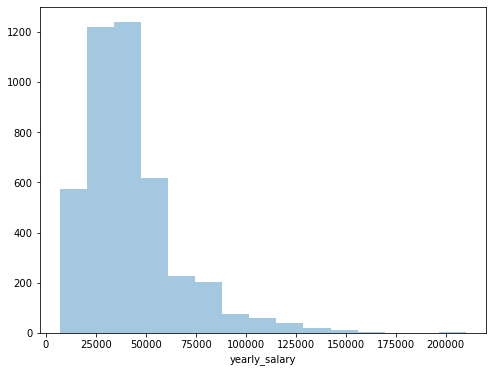

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(sal_nona.yearly_salary, bins=15, kde=False, ax=ax)
plt.show()

#### Thought experiment: What is the baseline accuracy for this model?

Baseline of the model

In [29]:
sal_nona.salary_quality.value_counts(normalize=True)

low     0.504542
high    0.495458
Name: salary_quality, dtype: float64

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score

In [31]:
sal_dum = pd.get_dummies(sal_nona, columns=['city_scraped'], drop_first=True)

In [32]:
# sal_dum.iloc[:,6::]

In [33]:
X = sal_dum.iloc[:,6::].copy()
y = X.pop('salary_quality')


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yearly_salary               4293 non-null   float64
 1   city_scraped_Bradford       4293 non-null   uint8  
 2   city_scraped_Bristol        4293 non-null   uint8  
 3   city_scraped_Cambridge      4293 non-null   uint8  
 4   city_scraped_Edinburgh      4293 non-null   uint8  
 5   city_scraped_Glasgow        4293 non-null   uint8  
 6   city_scraped_Leeds          4293 non-null   uint8  
 7   city_scraped_Liverpool      4293 non-null   uint8  
 8   city_scraped_London         4293 non-null   uint8  
 9   city_scraped_Manchester     4293 non-null   uint8  
 10  city_scraped_Newcastle      4293 non-null   uint8  
 11  city_scraped_Oxford         4293 non-null   uint8  
 12  city_scraped_Sheffield      4293 non-null   uint8  
 13  city_scraped_Sunderland     4293 

In [35]:
X = X.drop(columns = ['yearly_salary'])

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   city_scraped_Bradford       4293 non-null   uint8
 1   city_scraped_Bristol        4293 non-null   uint8
 2   city_scraped_Cambridge      4293 non-null   uint8
 3   city_scraped_Edinburgh      4293 non-null   uint8
 4   city_scraped_Glasgow        4293 non-null   uint8
 5   city_scraped_Leeds          4293 non-null   uint8
 6   city_scraped_Liverpool      4293 non-null   uint8
 7   city_scraped_London         4293 non-null   uint8
 8   city_scraped_Manchester     4293 non-null   uint8
 9   city_scraped_Newcastle      4293 non-null   uint8
 10  city_scraped_Oxford         4293 non-null   uint8
 11  city_scraped_Sheffield      4293 non-null   uint8
 12  city_scraped_Sunderland     4293 non-null   uint8
 13  city_scraped_Wolverhampton  4293 non-null   uint8
dtypes: uint8

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=1)

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=5)

print('Train Score', model.score(X_train, y_train))
print('Scores', scores)
print('CV Score', np.mean(scores))
print('Model Score', model.score(X_test, y_test))

Train Score 0.5425160163075131
Scores [0.53129549 0.52838428 0.54002911 0.54730713 0.55685131]
CV Score 0.5407734647196372
Model Score 0.5366705471478463


Testing if the model improves under l2, l1 or ElasticNet regularization

In [42]:
from sklearn.linear_model import LogisticRegressionCV

lr_ridge = LogisticRegressionCV(
    penalty='l2', Cs=100, cv=5)
lr_ridge.fit(X_train, y_train)

print(lr_ridge.C_)
print(lr_ridge.score(X_train, y_train))
print(lr_ridge.score(X_test, y_test))

[0.04641589]
0.5425160163075131
0.5366705471478463


In [43]:
lr_ridge_best = LogisticRegression(penalty='l2', C=lr_ridge.C_[0])
cross_val_score(lr_ridge_best, X_train, y_train, cv=5).mean()
lr_ridge_best.fit(X_train,y_train)

LogisticRegression(C=0.04641588833612782)

In [44]:
lr_lasso = LogisticRegressionCV(
    penalty='l1', solver='liblinear', Cs=100, cv=5)
lr_lasso.fit(X_train, y_train)

print(lr_lasso.C_)
print(lr_lasso.score(X_train, y_train))
print(lr_lasso.score(X_test, y_test))

[0.43287613]
0.5425160163075131
0.5366705471478463


In [45]:
lr_lasso_best = LogisticRegression(penalty='l1', C=lr_lasso.C_[0], solver='liblinear')
cross_val_score(lr_lasso_best, X_train, y_train, cv=5).mean()


0.5407734647196372

In [46]:
lr_el = LogisticRegressionCV(
    penalty='elasticnet', solver='saga', Cs=100, cv=5, 
    l1_ratios=[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99], 
    n_jobs=1, verbose=0)
lr_el.fit(X_train, y_train)

print(lr_el.C_)
print(lr_el.l1_ratio_)
print(lr_el.score(X_train, y_train))
print(lr_el.score(X_test, y_test))

[0.04641589]
[0.0001]
0.5425160163075131
0.5366705471478463


In [47]:
lr_el_best = LogisticRegression(penalty='elasticnet', C=lr_el.C_[0], l1_ratio=lr_el.l1_ratio_[0], solver='saga')
cross_val_score(lr_el_best, X_train, y_train, cv=5).mean()

0.5407734647196372

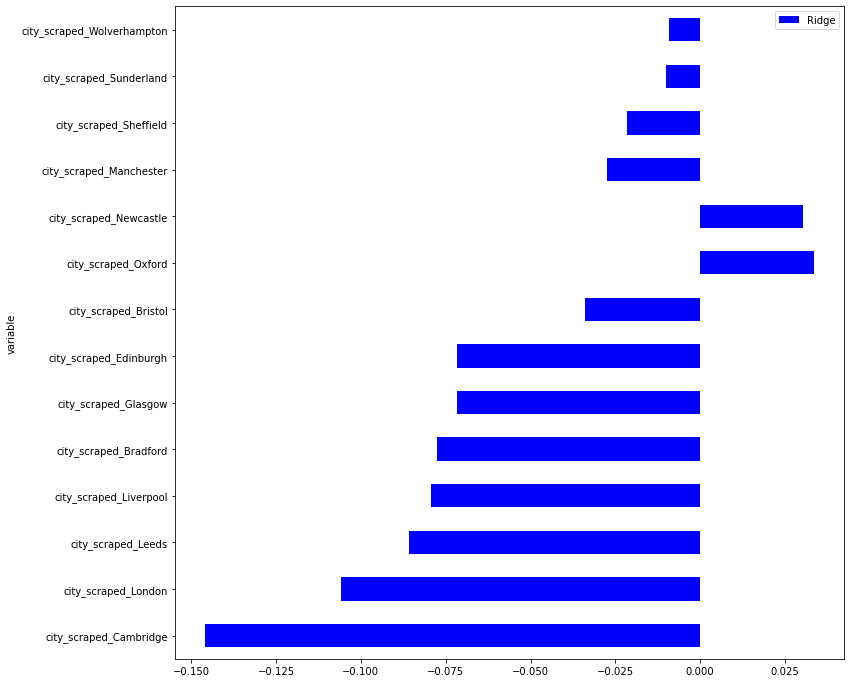

In [48]:
coefs_vars_ridge = pd.DataFrame({
    'coef': lr_ridge.coef_[0],
    'variable': X.columns,
    'abscoef': np.abs(lr_ridge.coef_[0])
})
coefs_vars_ridge.sort_values('abscoef', ascending=False, inplace=True)
coefs_vars_ridge.plot(kind='barh', x='variable', y='coef',
                      color='b', figsize=(12, 12), label='Ridge')
plt.show()

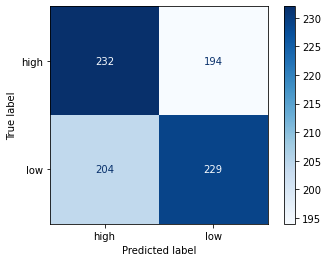

In [49]:

plot_confusion_matrix(lr_ridge_best, X_test, y_test, cmap='Blues')

Fit a kNN model

In [576]:
from sklearn.neighbors import KNeighborsClassifier

In [577]:
scores = []
max_k = 180
for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))

In [578]:
np.argmax(scores)+1, max(scores)

(92, 0.532625476890694)

In [580]:
scores_manhattan = []
for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    scores_manhattan.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))
    
np.argmax(scores_manhattan)+1, max(scores_manhattan)

(92, 0.532625476890694)

In [581]:
scores_distance = []
for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores_distance.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))

np.argmax(scores_distance)+1, max(scores_distance)

(131, 0.5352421692320097)

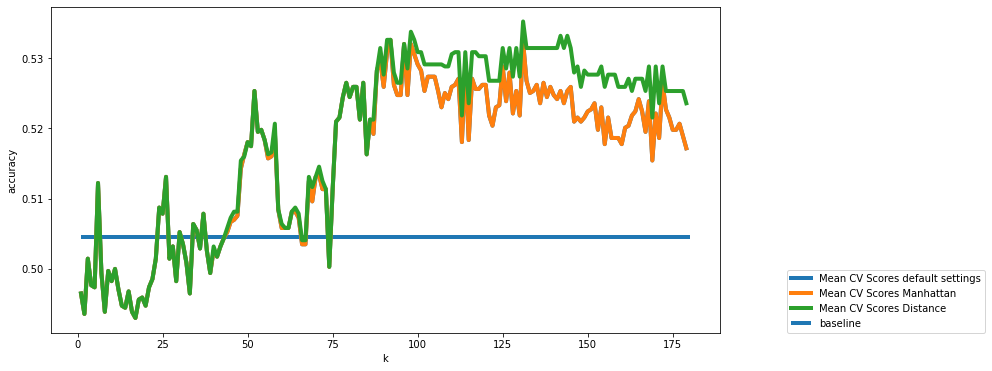

In [582]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(range(1, max_k), scores, label='Mean CV Scores default settings', lw=4)
ax.plot(range(1, max_k), scores_manhattan, label='Mean CV Scores Manhattan', lw=4)
ax.plot(range(1, max_k), scores_distance, label='Mean CV Scores Distance', lw=4)
ax.hlines(y.value_counts(normalize=True).max(), 1, max_k, label='baseline', lw=4)
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
ax.legend(loc=[1.1, 0])
plt.show()

In [583]:
knn = KNeighborsClassifier(n_neighbors=np.argmax(scores)+1)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))
print(knn.score(X_test, y_test))

0.539895165987187
0.532625476890694
0.5273573923166472


In [584]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))

In [586]:
def plot_f1_lines(figsize=(8, 6), fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)

    # add lines of constant F1 scores

    for const in np.linspace(0.2, 0.9, 8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                    xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

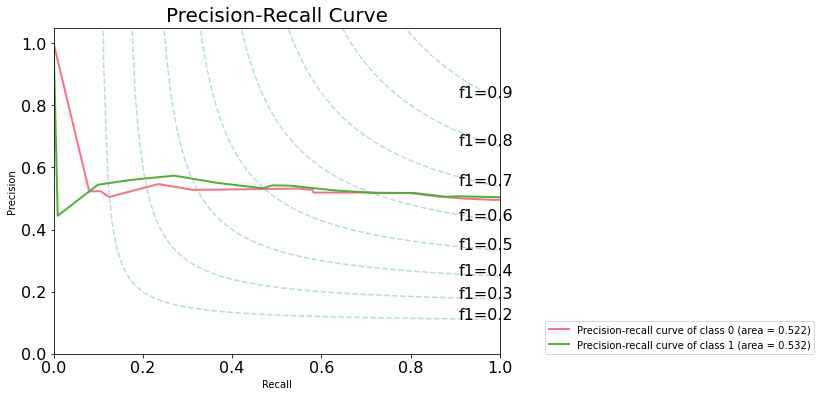

In [587]:
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, lr_ridge.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

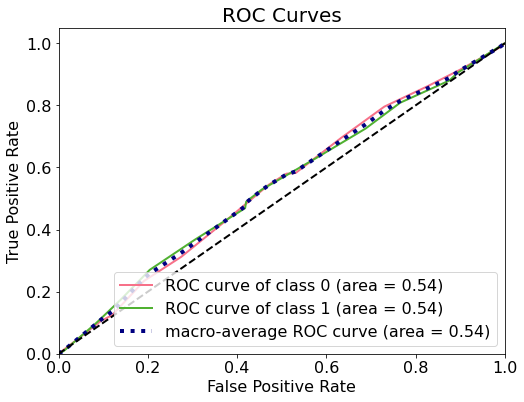

In [588]:
skplt.metrics.plot_roc(y_test, lr_ridge.predict_proba(X_test), plot_micro=False, plot_macro=True,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

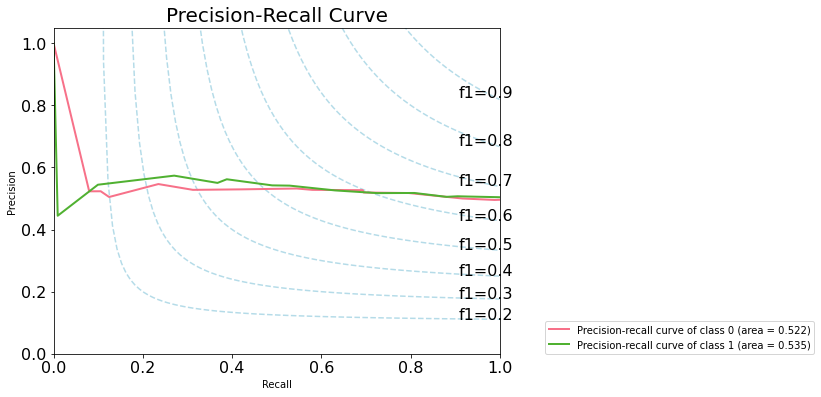

In [589]:
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, lr_lasso.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

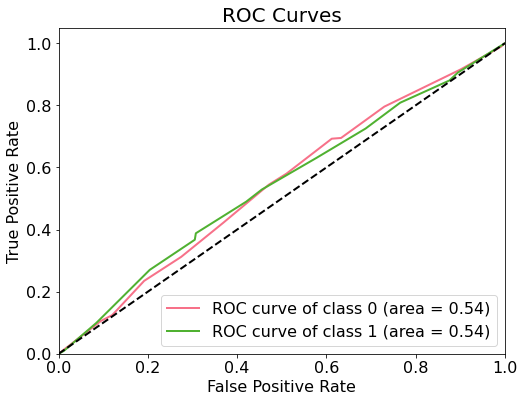

In [590]:
skplt.metrics.plot_roc(y_test, lr_lasso.predict_proba(X_test), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

### Create a classification model to predict High/Low salary. 


- Start by ONLY using the location as a feature.
- Use at least two different classifiers you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.
- Create a few new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value?
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models.
- Discuss model coefficients or feature importances as applicable.

In [474]:
sal_good.title.value_counts().head(40)

Data Analyst                                   187
Business Analyst                               100
Data Scientist                                  84
Data Engineer                                   81
Administrator                                   61
Data Architect                                  45
Senior Data Analyst                             38
Senior Data Engineer                            32
Data Administrator                              29
Office Administrator                            27
Senior Business Analyst                         27
Finance Analyst                                 27
BI Developer                                    25
Data Entry Clerk                                22
Data Manager                                    22
Commercial Finance Analyst                      22
Lead Data Engineer                              20
Business Systems Analyst                        19
Warehouse Administrator                         19
Analytics Manager              


senior, junior, manager, lead, analyst,developer,SQL,analytics - multi one

### Model evaluation:

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs.


- Use cross-validation to evaluate your models.
- Evaluate the accuracy, AUC, precision and recall of the models.
- Plot the ROC and precision-recall curves for at least one of your models.

I will now take different features to predict the high low salary:
    senior, junior, manager, lead, analyst,developer,SQL,analytics, principal, statistics
    intelligence,financ

In [50]:
sal_nona['manager'] = sal_nona['title'].apply(
    lambda x: 'manager' if 'manager' in x.lower() else 'non manager')

In [51]:
sal_nona.manager.value_counts(normalize=True)

non manager    0.934312
manager        0.065688
Name: manager, dtype: float64

In [52]:
sal_nona['senior'] = sal_nona['title'].apply(
    lambda x: 'senior' if 'senior' in x.lower() else 'non senior')

In [53]:
sal_nona.senior.value_counts(normalize=True)

non senior    0.897508
senior        0.102492
Name: senior, dtype: float64

In [54]:
sal_nona['junior'] = sal_nona['title'].apply(
    lambda x: 'junior' if 'junior' in x.lower() else 'non junior')

In [55]:
sal_nona.junior.value_counts(normalize=True)

non junior    0.981132
junior        0.018868
Name: junior, dtype: float64

In [56]:
sal_nona['lead'] = sal_nona['title'].apply(
    lambda x: 'lead' if 'lead' in x.lower() else 'non lead')

In [57]:
sal_nona.lead.value_counts(normalize=True)

non lead    0.955509
lead        0.044491
Name: lead, dtype: float64

In [58]:
sal_nona['analyst'] = sal_nona['title'].apply(
    lambda x: 'analyst' if 'analyst' in x.lower() else 'non analyst')

In [59]:
sal_nona.analyst.value_counts(normalize=True)

non analyst    0.619147
analyst        0.380853
Name: analyst, dtype: float64

In [60]:
sal_nona['developer'] = sal_nona['title'].apply(
    lambda x: 'developer' if 'developer' in x.lower() else 'non developer')

In [61]:
sal_nona.developer.value_counts(normalize=True)

non developer    0.928488
developer        0.071512
Name: developer, dtype: float64

In [62]:
sal_nona['sql'] = sal_nona['title'].apply(
    lambda x: 'sql' if 'sql' in x.lower() else 'non sql')

In [63]:
sal_nona.sql.value_counts(normalize=True)

non sql    0.935243
sql        0.064757
Name: sql, dtype: float64

In [64]:
sal_nona['analytics'] = sal_nona['title'].apply(
    lambda x: 'analytics' if 'analytics' in x.lower() else 'non analytics')

In [65]:
sal_nona.analytics.value_counts(normalize=True)

non analytics    0.964826
analytics        0.035174
Name: analytics, dtype: float64

In [66]:
sal_nona['principal'] = sal_nona['title'].apply(
    lambda x: 'principal' if 'principal' in x.lower() else 'non principal')

In [67]:
sal_nona.principal.value_counts(normalize=True)

non principal    0.991847
principal        0.008153
Name: principal, dtype: float64

In [68]:
sal_nona['statistics'] = sal_nona['title'].apply(
    lambda x: 'statistics' if 'statistics' in x.lower() else 'non statistics')

In [69]:
sal_nona.statistics.value_counts(normalize=True)

non statistics    0.993478
statistics        0.006522
Name: statistics, dtype: float64

In [70]:
sal_nona['financ'] = sal_nona['title'].apply(
    lambda x: 'financ' if 'financ' in x.lower() else 'non financ')

In [71]:
sal_nona.financ.value_counts(normalize=True)

non financ    0.948288
financ        0.051712
Name: financ, dtype: float64

In [72]:
sal_nona['intelligence'] = sal_nona['title'].apply(
    lambda x: 'intelligence' if 'intelligence' in x.lower() else 'non intelligence')

In [73]:
sal_nona.intelligence.value_counts(normalize=True)

non intelligence    0.970417
intelligence        0.029583
Name: intelligence, dtype: float64

In [74]:
sal_nona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           4293 non-null   int64  
 1   title           4293 non-null   object 
 2   company         4293 non-null   object 
 3   location        4087 non-null   object 
 4   salary          4293 non-null   object 
 5   date            4293 non-null   object 
 6   city_scraped    4293 non-null   object 
 7   yearly_salary   4293 non-null   float64
 8   salary_quality  4293 non-null   object 
 9   manager         4293 non-null   object 
 10  senior          4293 non-null   object 
 11  junior          4293 non-null   object 
 12  lead            4293 non-null   object 
 13  analyst         4293 non-null   object 
 14  developer       4293 non-null   object 
 15  sql             4293 non-null   object 
 16  analytics       4293 non-null   object 
 17  principal       4293 non-null   o

In [75]:
# sal_nona.to_csv("features.csv", encoding="utf-8")

In [76]:
X2 = pd.get_dummies(sal_nona.iloc[:,9::],drop_first=True)
y2=sal_nona.salary_quality

In [77]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, stratify=y, test_size=0.2, random_state=1)

In [78]:
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

In [79]:
model = LogisticRegression(penalty='none')
model.fit(X2_train, y2_train)
scores = cross_val_score(model, X2_train, y2_train, cv=5)
print('Train Score', model.score(X2_train, y2_train))
print('Scores', scores)
print('CV Score', np.mean(scores))
print('Model Score', model.score(X2_test, y2_test))

Train Score 0.6575422248107163
Scores [0.61717613 0.69286754 0.65793304 0.65211063 0.64723032]
CV Score 0.6534635313888499
Model Score 0.640279394644936


In [80]:
lr_ridge = LogisticRegressionCV(
    penalty='l2', Cs=100, cv=5)
lr_ridge.fit(X2_train, y2_train)

print(lr_ridge.C_)
print(lr_ridge.score(X2_train, y2_train))
print(lr_ridge.score(X2_test, y2_test))

[0.00021049]
0.663075131042516
0.6461001164144354


In [81]:
lr_ridge_best = LogisticRegression(penalty='l2', C=lr_ridge.C_[0])
print('CV Score Ridge', cross_val_score(lr_ridge_best, X2_train, y2_train, cv=5).mean())
lr_ridge_best.fit(X2_train,y2_train)

CV Score Ridge 0.6595787660042183


LogisticRegression(C=0.00021049041445120198)

In [82]:
lr_lasso = LogisticRegressionCV(
    penalty='l1', solver='liblinear', Cs=100, cv=5)
lr_lasso.fit(X2_train, y2_train)

print(lr_lasso.C_)
print(lr_lasso.score(X2_train, y2_train))
print(lr_lasso.score(X2_test, y2_test))
lr_lasso_best = LogisticRegression(penalty='l1', C=lr_lasso.C_[0], solver='liblinear')
print('CV Score Lasso', cross_val_score(lr_lasso_best, X2_train, y2_train, cv=5).mean())

[0.20565123]
0.6578334304018637
0.6437718277066357
CV Score Lasso 0.6534635313888499


In [696]:
lr_el = LogisticRegressionCV(
    penalty='elasticnet', solver='saga', Cs=100, cv=5, 
    l1_ratios=[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99], 
    n_jobs=1, verbose=0)
lr_el.fit(X2_train, y2_train)

print(lr_el.C_)
print(lr_el.l1_ratio_)
print(lr_el.score(X2_train, y2_train))
print(lr_el.score(X2_test, y2_test))
lr_el_best = LogisticRegression(penalty='elasticnet', C=lr_el.C_[0], l1_ratio=lr_el.l1_ratio_[0], solver='saga')
print('CV Score ELastic net', cross_val_score(lr_el_best, X2_train, y2_train, cv=5).mean())

/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/giacomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

[0.00014508]
[0.001]
0.663948747815958
0.6507566938300349
CV Score ELastic net 0.6598711599424549


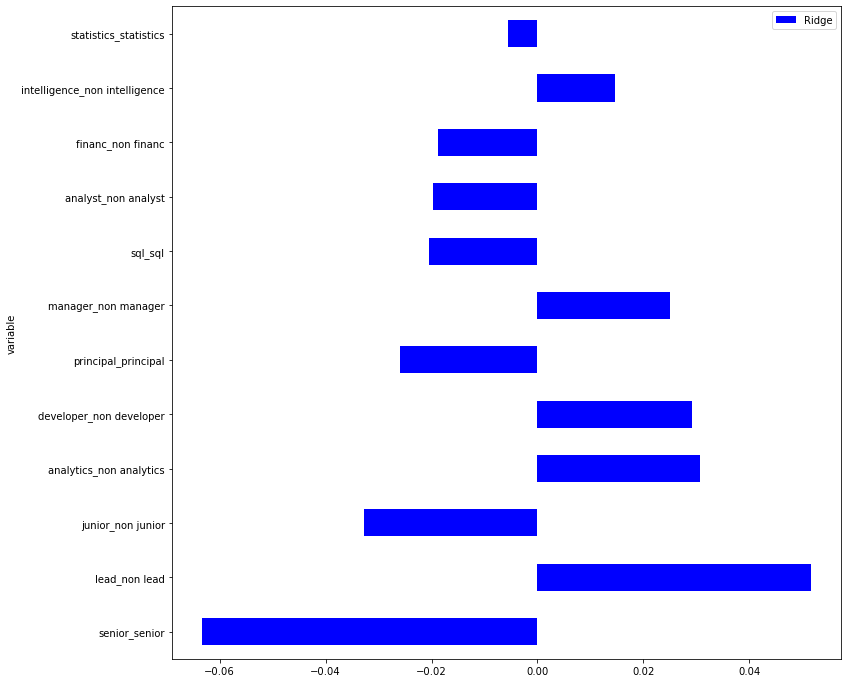

In [83]:
coefs_vars_ridge = pd.DataFrame({
    'coef': lr_ridge.coef_[0],
    'variable': X2.columns,
    'abscoef': np.abs(lr_ridge.coef_[0])
})
coefs_vars_ridge.sort_values('abscoef', ascending=False, inplace=True)
coefs_vars_ridge.plot(kind='barh', x='variable', y='coef',
                      color='b', figsize=(12, 12), label='Ridge')
plt.show()

In [6]:
# # lr_lasso.classes_
# my zero class is HIGH

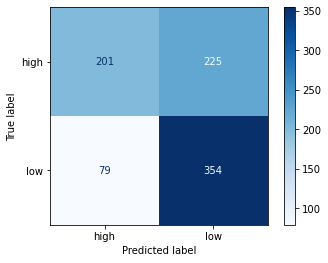

In [699]:
plot_confusion_matrix(lr_ridge_best, X2_test, y2_test, cmap='Blues')

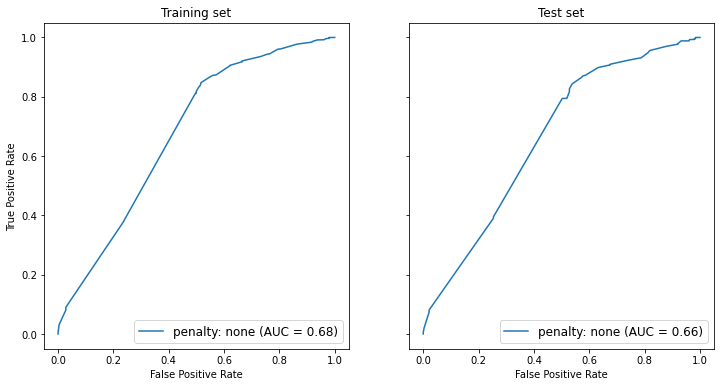

In [703]:
fig_roc, ax_roc = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plot_roc_curve(lr_ridge_best, X2_train, y2_train, ax=ax_roc[0], name='penalty: none')
plot_roc_curve(lr_ridge_best, X2_test, y2_test, ax=ax_roc[1], name='penalty: none')
ax_roc[0].legend(loc='lower right', fontsize=12)
ax_roc[1].legend(loc='lower right', fontsize=12)
ax_roc[1].set_ylabel(None)
ax_roc[0].set_title('Training set')
ax_roc[1].set_title('Test set')
plt.show()

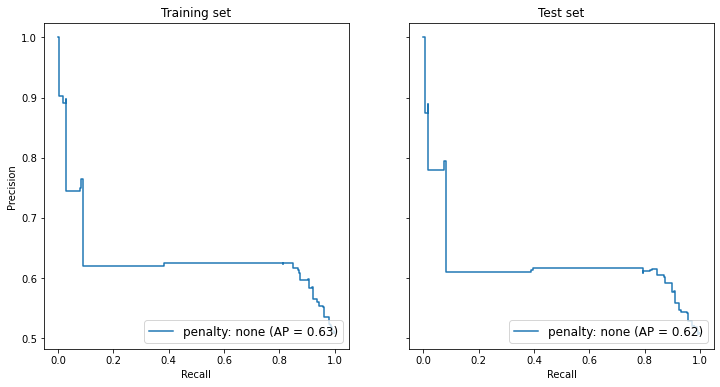

In [84]:
fig_pr, ax_pr = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plot_precision_recall_curve(lr_ridge_best, X2_train, y2_train, ax=ax_pr[0], name='penalty: none')
plot_precision_recall_curve(lr_ridge_best, X2_test, y2_test, ax=ax_pr[1], name='penalty: none')
ax_pr[0].legend(loc='lower right', fontsize=12)
ax_pr[1].legend(loc='lower right', fontsize=12)
ax_pr[1].set_ylabel(None)
ax_pr[0].set_title('Training set')
ax_pr[1].set_title('Test set')
plt.show()

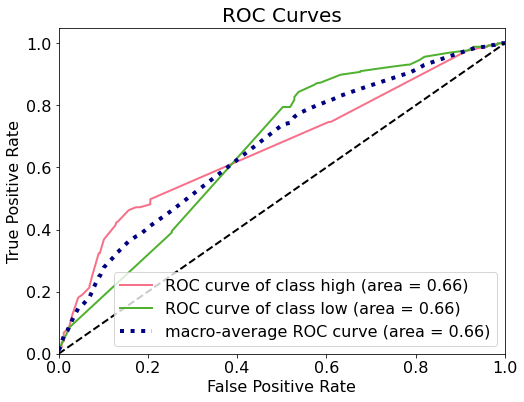

In [704]:
skplt.metrics.plot_roc(y2_test, lr_ridge_best.predict_proba(X2_test), plot_micro=False, plot_macro=True,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

Senior, Lead, Juior and Analytics seem to explain a bit better if the salary is low or
high even if from the confusion matrix we can see that we still have too many
false negatives(predicted low but actually high) so we can't really read too 
much from these coefficients.



I WILL NOW TRY WITH other CLASSIFIERS MODEL

In [97]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.tree import export_graphviz
import graphviz

In [98]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X2_train, y2_train)

print('Train Score ', model.score(X2_train, y2_train))
print('CV Score', cross_val_score(model, X2_train, y2_train, cv=5).mean())
print('Test Score', model.score(X2_test, y2_test))

Train Score  0.6191030867792662
CV Score 0.6115255834086597
Test Score 0.6041909196740396


In [99]:
base_estimator = DecisionTreeClassifier(max_depth=3, max_features=0.8)
model = BaggingClassifier(base_estimator=base_estimator,
                           n_estimators=100,
                           random_state=1)
model.fit(X2_train, y2_train)

print('Train Score ', model.score(X2_train, y2_train))
print('CV Score', cross_val_score(model, X2_train, y2_train, cv=5).mean())
print('Test Score' ,model.score(X2_test, y2_test))

Train Score  0.6423995340710542
CV Score 0.6231725378860216
Test Score 0.6286379511059371


In [100]:
model = RandomForestClassifier(
                           n_estimators=100,
                           random_state=1)
model.fit(X2_train, y2_train)

print('Train Score', model.score(X2_train, y2_train))
print('CV Score', cross_val_score(model, X2_train, y2_train, cv=5).mean())
print('Test Score', model.score(X2_test, y2_test))

Train Score 0.6721025043680838
CV Score 0.6697705407802548
Test Score 0.6635622817229336


In [101]:
col = list(X2.columns)

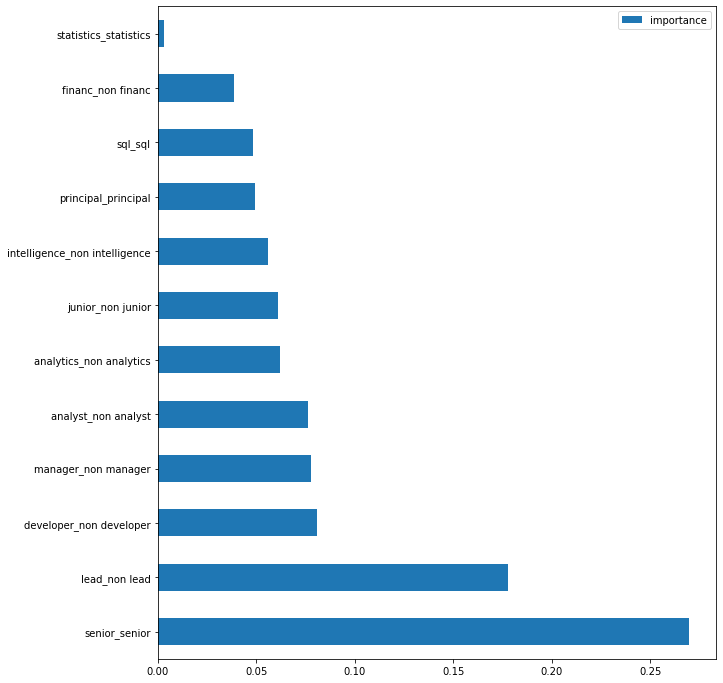

In [102]:
pd.DataFrame(model.feature_importances_,
             columns=['importance'],
             index=col
             ).sort_values(by='importance', ascending=False
                           ).plot(kind='barh', figsize=(10, 12))
plt.show()

Trying with AdaBoost

In [103]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [104]:
base_estimator = DecisionTreeClassifier(max_depth=3)
model = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=10,
                           random_state=1, algorithm='SAMME')
model.fit(X2_train, y2_train)

print(model.score(X2_train, y2_train))
print(cross_val_score(model, X2_train, y2_train, cv=5).mean())
print(model.score(X2_test, y2_test))

0.6537565521258009
0.6557929222843224
0.6484284051222352


In [105]:
model = GradientBoostingClassifier(
    n_estimators=100,
    criterion='mse',
    loss='deviance',
    max_depth=3,
    learning_rate=1.0,
    random_state=1)

model.fit(X2_train, y2_train)

print(model.score(X2_train, y2_train))
print(cross_val_score(model, X2_train, y2_train, cv=5, n_jobs=-2).mean())
print(model.score(X2_test, y2_test))

0.6721025043680838
0.668023815889425
0.6647264260768335


RANDOM FOREST has the best score

In [106]:
rf = RandomForestClassifier(
                           n_estimators=100,
                           random_state=1)
rf.fit(X2_train, y2_train)

print('Train Score', rf.score(X2_train, y2_train))
print('CV Score', cross_val_score(rf, X2_train, y2_train, cv=5).mean())
print('Test Score', rf.score(X2_test, y2_test))

Train Score 0.6721025043680838
CV Score 0.6697705407802548
Test Score 0.6635622817229336


In [107]:
import scikitplot as skplt
predictions_train = rf.predict(X2_train)
predictions_test = rf.predict(X2_test)
probabilities_train = rf.predict_proba(X2_train)
probabilities_test = rf.predict_proba(X2_test)

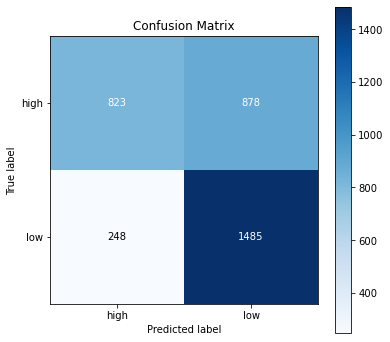

In [108]:
skplt.metrics.plot_confusion_matrix(y2_train, predictions_train, figsize=(6,6))
plt.show()

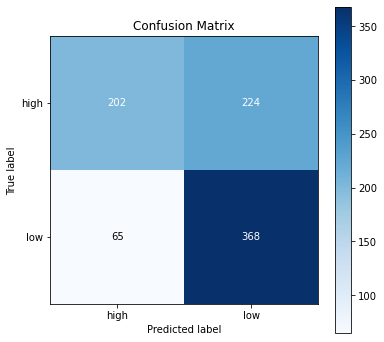

In [109]:
skplt.metrics.plot_confusion_matrix(y2_test, predictions_test, figsize=(6, 6))
plt.show()

In [110]:
print(classification_report(y2_train, predictions_train))

              precision    recall  f1-score   support

        high       0.77      0.48      0.59      1701
         low       0.63      0.86      0.73      1733

    accuracy                           0.67      3434
   macro avg       0.70      0.67      0.66      3434
weighted avg       0.70      0.67      0.66      3434



In [111]:
print(classification_report(y2_test, predictions_test))

              precision    recall  f1-score   support

        high       0.76      0.47      0.58       426
         low       0.62      0.85      0.72       433

    accuracy                           0.66       859
   macro avg       0.69      0.66      0.65       859
weighted avg       0.69      0.66      0.65       859



In [112]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", len(rf.classes_)))

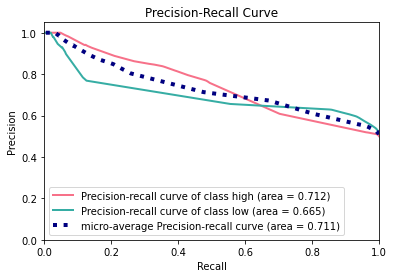

In [113]:
skplt.metrics.plot_precision_recall(y2_train, probabilities_train, cmap=cmap)
plt.show()

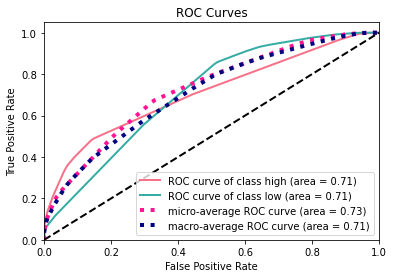

In [114]:
skplt.metrics.plot_roc(y2_train, probabilities_train, cmap=cmap)
plt.show()

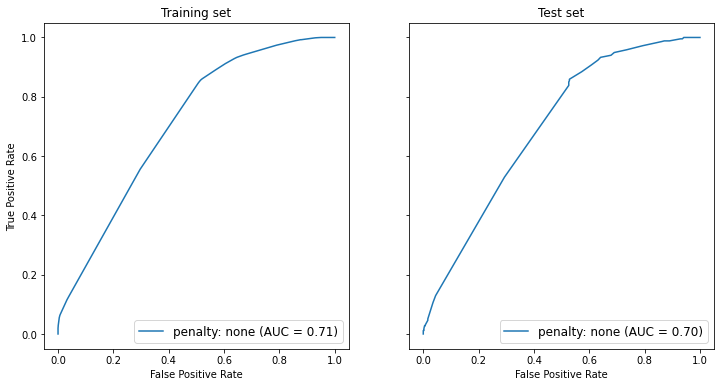

In [116]:
fig_roc, ax_roc = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plot_roc_curve(rf, X2_train, y2_train, ax=ax_roc[0], name='penalty: none')
plot_roc_curve(rf, X2_test, y2_test, ax=ax_roc[1], name='penalty: none')
ax_roc[0].legend(loc='lower right', fontsize=12)
ax_roc[1].legend(loc='lower right', fontsize=12)
ax_roc[1].set_ylabel(None)
ax_roc[0].set_title('Training set')
ax_roc[1].set_title('Test set')
plt.show()

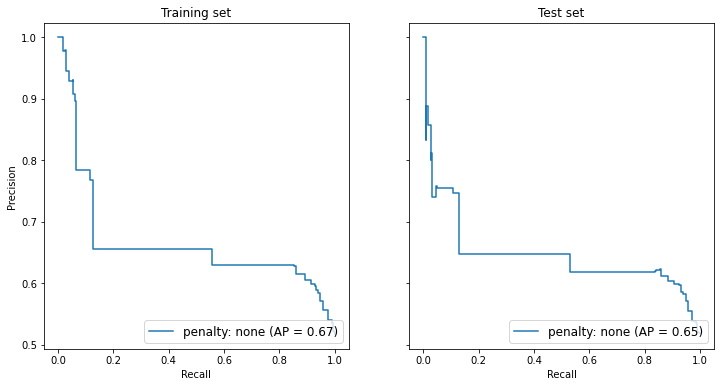

In [117]:
fig_pr, ax_pr = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plot_precision_recall_curve(rf, X2_train, y2_train, ax=ax_pr[0], name='penalty: none')
plot_precision_recall_curve(rf, X2_test, y2_test, ax=ax_pr[1], name='penalty: none')
ax_pr[0].legend(loc='lower right', fontsize=12)
ax_pr[1].legend(loc='lower right', fontsize=12)
ax_pr[1].set_ylabel(None)
ax_pr[0].set_title('Training set')
ax_pr[1].set_title('Test set')
plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### Bonus:

- Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.
- Obtain the ROC/precision-recall curves for the different models you studied (at least the tuned model of each category) and compare.

In [115]:
# changing treshold in predicted probabilities. heart disease classification
# look at the predictred probabilities.

# auc how well the model is performing - recall what we lose trying to get
# more recall. high legt, low on the right

In [ ]:
## YOUR CODE HERE

### Summarize your results in an executive summary written for a non-technical audience.
   
- Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

EXEXUTIVE SUMMARY : WEB SCRAPING FROM INDEED AND ASOLVING A CLASSIFICATION PROBLEM.

Goal: determine the industry factors that are most important in predicting the salary amounts for data science jobs.
I have been focusing on data-related job postings for the UK as advertised on indeed.co.uk. I used the web-scraping techniques to collect data on data jobs from Indeed.com and .Once collected and cleaned the data, I used  it to address the question above.

WEB SCRAPING: 
I Setup a request (using requests) to the URL URL = https://www.indeed.co.uk/jobs?q=data&l=London%2C+Greater+London and used BeautifulSoup to parse the page and extract all results .

-	I have first tried to retrieve one page with the following info: title, company, location, salary, date and the city I entered in the search engine which I will then utilize if a value is missing from the city column.
-	Wrote 5 functions to extract each item separately
-	Plugged the fucntions into a master functions to look for multiple cities and multiple pages
-	I have chosen the biggest cities in the UK but since I got blocked from the websites I scraped for a few cities per time and not all at the same time and then aggregated the dataframes all together.
-	The blocks of cities I scraped for separately were: [London , Manchester];[ 'Oxford','Sheffield','Liverpool']; ['Cambridge','Wolverhampton','Glasgow','Edinburgh']; ['Leeds',            'Bradford','Bristol','Sunderland']; ['Birmingham', 'Newcastle',].
-	I saved each block in separate csvs, removed duplicates and concatenated everything into a the sal dataframe.
Cleaning:
After removing supplicates I clean the dataset removing: £,- and making salaries  Yearly salaries and  transforming ranges of salaried into average salaries.
I created a yearly salary column and saved into a csv as "yearly_salary_nona.csv".

MODELING: classification problem
1)Goal: predict a binary variable - whether the salary was low or high.
Predictors: Locations scraped 
I Computed the median salary and create a new binary variable that is true when the salary is high (above the median).
The baseline accuracy for the model was 0.5045.
Process: dummified the cities scraped, dropping the first and ended up with 14 predictors and one target variables which was the high/low salary.
For the Logistic Regression model I got 0.54 as CV score, RidgeCV 0.54, Lasso 0.54, ElasticNet 0.54. The biggest coefficients were Cambridge, London , Leeds, Liverpool and Bradford.
They were all negative as the biggest class was LOW (50,4%) and I was predicting the LOW class. Looking at the confusion matric we can see that we have a high number of false negative and false positive hence we need to be careful to draw conclusions from these coefficients.
KNN does not improve the score and scores at 0.53 with both Manhattan and Euclidean Distance.
The ROC curves shows a small area under the curve not far from baseline. The quality of the classification models is not high hence we should probably look for some other models or some other features in the same models. LOCATION as a feature has not much predictive power.
At the question  “Are high salaries for data roles related to the cities where they are available?” we can answer with a certain degree of confidence that the city is not a great predictor of high or low salary.

2)Goal: predict a binary variable - whether the salary was low or high.Predictors: features contained the Job Title 
In this second attempt I am trying to answer the question : “Are high salaries for data roles related to some specific indications in the job title?”

I took different features to predict the high/low salary:
senior, junior, manager, lead, analyst,developer,SQL,analytics, principal, statistics
intelligence,finance.

1)The Logistic regression model improved from the previous model up to 0.6525 for the CV scores, Ridge reached 0.66 and Lasso 0.653 and ElasticNet 0.6598.
The coefficients for Ridge show that Senior and junior are the highest negative coefficients and lead and  analytics  the highest positive. Again, we are predicting class LOW 0 hence they are inverted and a bit counterintuitive to read.
From the confucion matrix we can see that we have a large number of false negatives (225) , a high number of true positives (201) and true negatives (354) and some False positives (79).
The model does not guarantee we will be able to predict the LOW salaries correctly and we are likely to predict them as high. From the AUC charts we can see that when the true positive rates increases, the false positive rate also increases dramatically on both the training and the test set and from the precision-recall chat we see that in order to keep a high precision we have to give up the recall and at a 0.65 level of precision we only get a 0.1 recall.
The ROC curves confirm the statements above.

2) I changed the model and tried with Decision tree classifiers: simple, bagging, Random Forest,AdaBoost, GradientBoost
Random Forest scored the highest at 0.6697 and showing that Senior, Lead, Develper, Manager and Analyst are the most important features to be separated in the model.

From the confusion matrices the situation looks a bit better but the number of false positives is still very high and the ROC, AUC curves confirm what stated earlier: we have high precisiononly with really low recall when the threshold is high. A balance doesn’t seem achievable with this model and features selection. In order to achieve a recall above 0.5 the precision averages at around 0.65.






<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### BONUS

Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

In [ ]:
## YOUR LINK HERE IN MARKDOWN FORMAT 